In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [2]:
# Cargar datos 'Airpassager.csv'
data = pd.read_csv('AirPassengers.csv')
print(data.to_string())

# Columnas Dataset
data.columns = ['Month', 'Passengers']

# Convertir la columna 'Month' a un formato de fecha
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')

# Convertir las fechas en números enteros
data['Month'] = pd.to_numeric(data['Month'])

# Normalizar los números
data['Month'] = (data['Month'] - data['Month'].min()) / (data['Month'].max() - data['Month'].min())


       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
5    1949-06          135
6    1949-07          148
7    1949-08          148
8    1949-09          136
9    1949-10          119
10   1949-11          104
11   1949-12          118
12   1950-01          115
13   1950-02          126
14   1950-03          141
15   1950-04          135
16   1950-05          125
17   1950-06          149
18   1950-07          170
19   1950-08          170
20   1950-09          158
21   1950-10          133
22   1950-11          114
23   1950-12          140
24   1951-01          145
25   1951-02          150
26   1951-03          178
27   1951-04          163
28   1951-05          172
29   1951-06          178
30   1951-07          199
31   1951-08          199
32   1951-09          184
33   1951-10          162
34   1951-11          146
35   1951-12          166
36   1952-01          171
37   1952-02

In [3]:
# Dividir datos en conjuntos de entrenamiento y prueba
X = data['Month']
y = data['Passengers']

X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[1:], test_size=0.2, random_state=42)

In [4]:
# tipo NumPy
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

## **Red multicapa profunda**

In [5]:
model_mlp = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])
model_mlp.compile(optimizer='adam', loss='mean_squared_error')
# Entrenar el modelo MLP
model_mlp.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 9ms/step - loss: 94988.0469
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 94918.3047
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 94833.7656
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 94714.1875
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 94573.1562
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 94388.9688
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 94156.2266
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 93842.1719
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 93457.1875
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 92969.7891
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 92296.5703
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 91502.3672
Epoch 13/100


In [6]:
# Registra el historial de entrenamiento
history_mlp = model_mlp.fit(X_train, y_train, epochs=100, verbose=1, validation_split=0.2)


Epoch 1/100
3/3 [==============================] - 0s 94ms/step - loss: 2263.9363 - val_loss: 2596.6833
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 2257.6792 - val_loss: 2590.7021
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 2250.0454 - val_loss: 2586.3596
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 2244.4211 - val_loss: 2583.0093
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 2233.6541 - val_loss: 2577.6362
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 2226.7544 - val_loss: 2571.6509
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 2220.3516 - val_loss: 2565.9919
Epoch 8/100
3/3 [==============================] - 0s 16ms/step - loss: 2213.4512 - val_loss: 2561.6721
Epoch 9/100
3/3 [==============================] - 0s 16ms/step - loss: 2207.0835 - val_loss: 2556.6448
Epoch 10/100
3/3 [==============================] - 0s 16ms/step

In [8]:
# Evaluar el modelo en el conjunto de prueba
X_test = X_test.to_numpy().reshape(-1, 1)
y_pred_mlp = model_mlp.predict(X_test)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("Modelo MLP - error cuadrático medio (MSE):", mse_mlp)
print("Modelo MLP - coeficiente de determinación (R^2),:", r2_mlp)

1/1 [==============================] - 0s 249ms/step
Modelo MLP - error cuadrático medio (MSE): 2139.0007638475045
Modelo MLP - coeficiente de determinación (R^2),: 0.8331976175697168


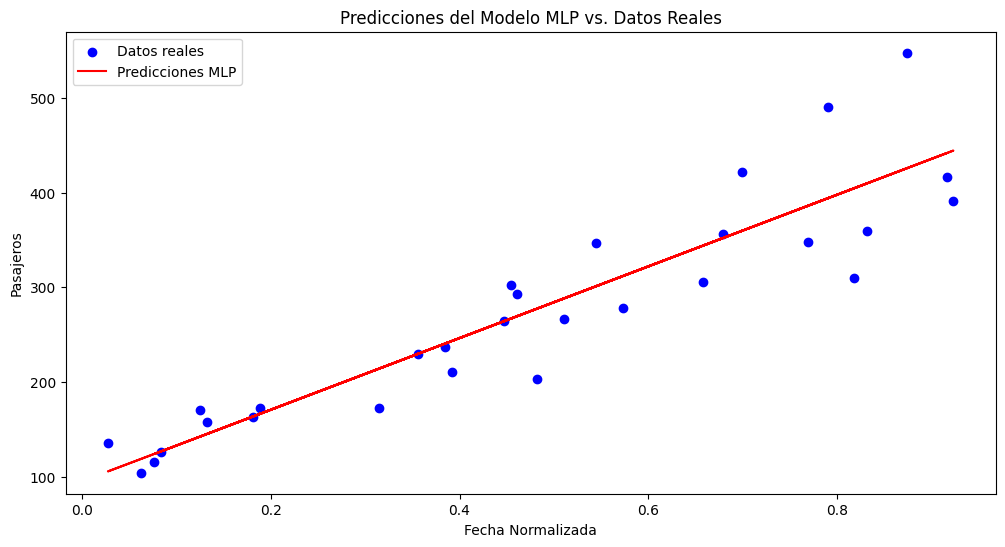

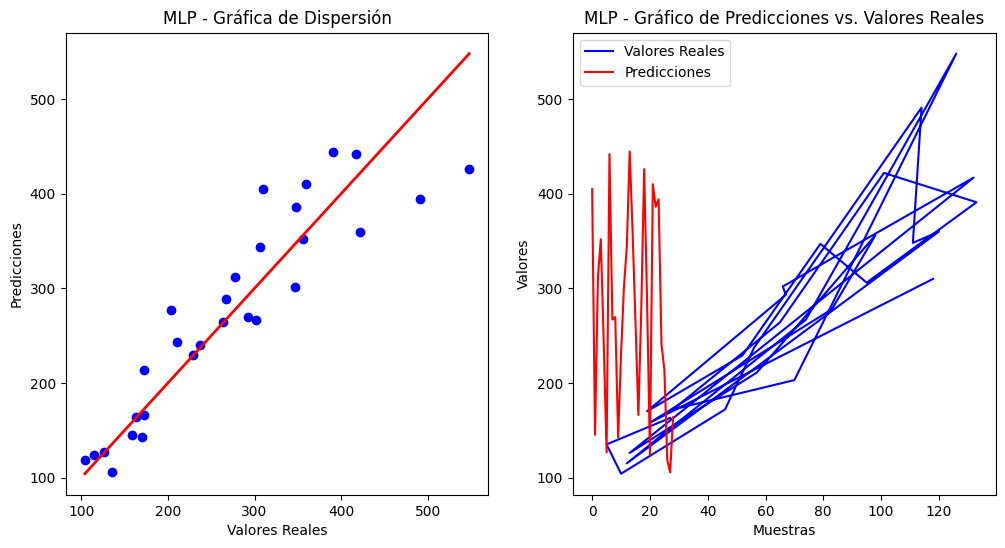

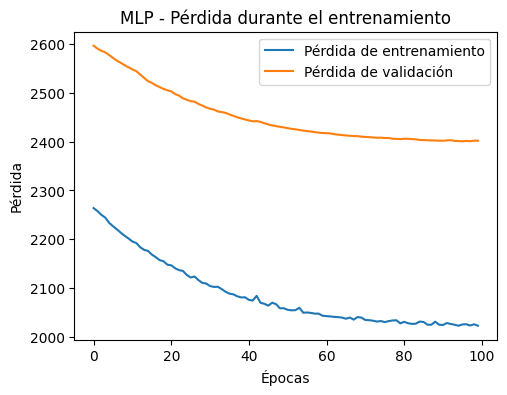

In [21]:
# Visualizar las predicciones frente a los datos reales
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred_mlp, color='red', label='Predicciones MLP')
plt.xlabel('Fecha Normalizada')
plt.ylabel('Pasajeros')
plt.legend()
plt.title('Predicciones del Modelo MLP vs. Datos Reales')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_mlp, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('MLP - Gráfica de Dispersión')

plt.subplot(1, 2, 2)
plt.plot(y_test, label='Valores Reales', color='blue')
plt.plot(y_pred_mlp, label='Predicciones', color='red')
plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.title('MLP - Gráfico de Predicciones vs. Valores Reales')
plt.legend()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_mlp.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.title('MLP - Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')

plt.show()

## **Convolutional Neural Network (CNN)**

In [10]:
X_train_cnn = X_train.reshape(-1, 1)
y_train_cnn = y_train.reshape(-1, 1)

In [11]:
model_cnn = keras.Sequential([
    keras.layers.Conv1D(128, kernel_size=1, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=1),
    keras.layers.Conv1D(64, kernel_size=1, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=1),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(1)
])

model_cnn.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo CNN
model_cnn.fit(X_train_cnn, y_train_cnn, epochs=100, verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 95050.9297
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 94987.6172
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 94919.1016
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 94843.1719
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 94745.7578
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 94624.2969
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 94468.2266
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 94268.3594
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 94018.3984
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 93697.2656
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 93278.8516
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 92791.6953
Epoch 13/100


In [12]:
# Registra el historial de entrenamiento
history_cnn = model_cnn.fit(X_train_cnn, y_train_cnn, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 0s 97ms/step - loss: 2636.9448 - val_loss: 2915.4980
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 2621.3171 - val_loss: 2906.2966
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 2606.9436 - val_loss: 2896.9260
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 2596.6260 - val_loss: 2888.6687
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 2585.0974 - val_loss: 2883.1042
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 2572.9424 - val_loss: 2877.1873
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 2561.5381 - val_loss: 2870.2371
Epoch 8/100
3/3 [==============================] - 0s 22ms/step - loss: 2551.3123 - val_loss: 2860.9360
Epoch 9/100
3/3 [==============================] - 0s 18ms/step - loss: 2539.7266 - val_loss: 2849.8171
Epoch 10/100
3/3 [==============================] - 0s 18ms/step

In [13]:
# Evaluar el modelo en el conjunto de prueba

X_test_cnn = X_test.reshape(-1, 1)
y_pred_cnn = model_cnn.predict(X_test_cnn)

mse_cnn = mean_squared_error(y_test, y_pred_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

print("Modelo cnn - error cuadrático medio (MSE):", mse_cnn)
print("Modelo cnn - coeficiente de determinación (R^2),:", r2_cnn)

1/1 [==============================] - 0s 131ms/step
Modelo cnn - error cuadrático medio (MSE): 2141.8094605449364
Modelo cnn - coeficiente de determinación (R^2),: 0.832978591326915


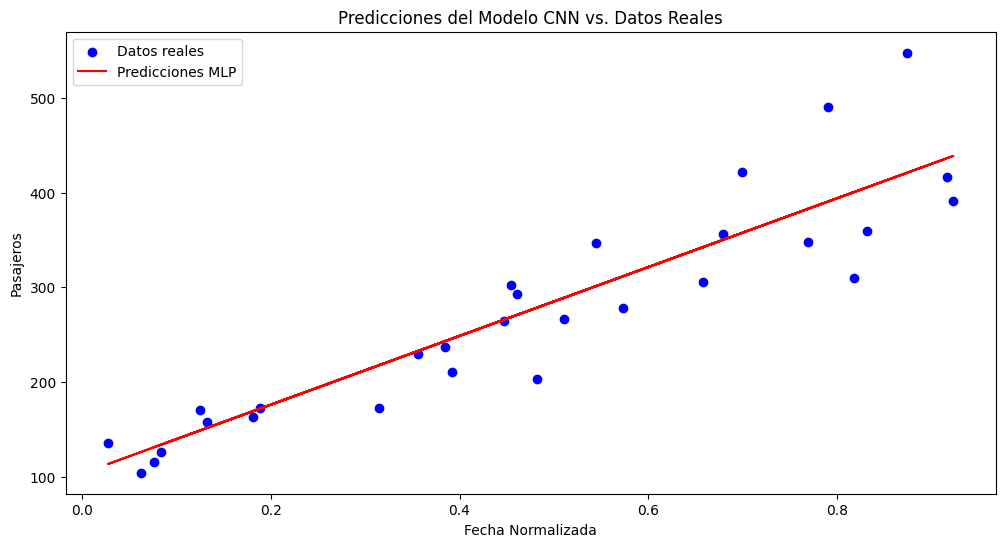

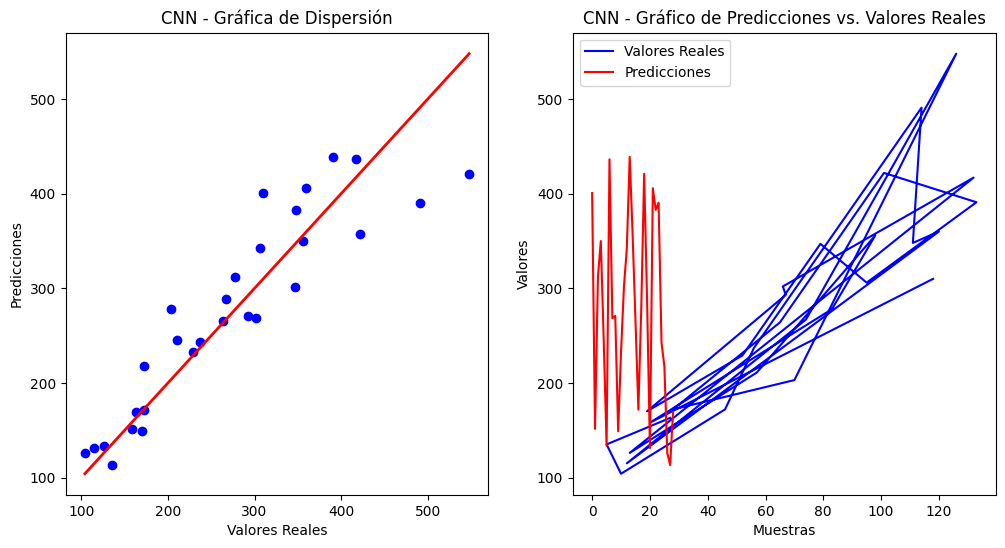

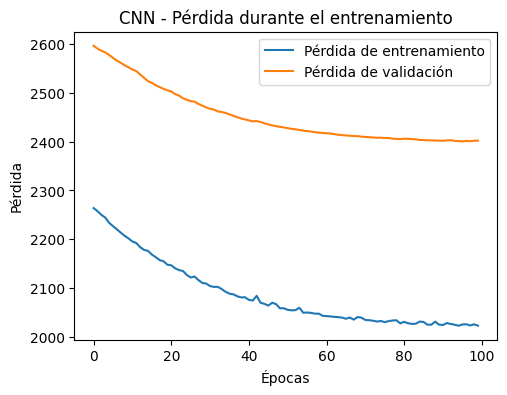

In [22]:
# Visualizar las predicciones frente a los datos reales
plt.figure(figsize=(12, 6))
plt.scatter(X_test_cnn, y_test, color='blue', label='Datos reales')
plt.plot(X_test_cnn, y_pred_cnn, color='red', label='Predicciones MLP')
plt.xlabel('Fecha Normalizada')
plt.ylabel('Pasajeros')
plt.legend()
plt.title('Predicciones del Modelo CNN vs. Datos Reales')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_cnn, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('CNN - Gráfica de Dispersión')

plt.subplot(1, 2, 2)
plt.plot(y_test, label='Valores Reales', color='blue')
plt.plot(y_pred_cnn, label='Predicciones', color='red')
plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.title('CNN - Gráfico de Predicciones vs. Valores Reales')
plt.legend()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_mlp.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.title('CNN - Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')

plt.show()

## **Redes recurrentes (LSTM)**

In [15]:
# tipo NumPy
X_train_LSTM = X_train.reshape(-1, 1)
y_train_LSTM = y_train.reshape(-1, 1)

In [17]:
# Crear un modelo basado en redes recurrentes (LSTM)
model_rnn = keras.Sequential([
    keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(1, 1)),
    keras.layers.LSTM(32, activation='relu'),
    keras.layers.Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
# model_rnn.fit(X_train.reshape(-1, 1, 1), y_train, epochs=100, verbose=0)

model_rnn.fit(X_train_LSTM, y_train_LSTM, epochs=100, verbose=1)

Epoch 1/100
4/4 [==============================] - 3s 6ms/step - loss: 95066.2266
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 95060.3516
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 95054.6875
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 95048.8750
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 95042.6562
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 95036.2344
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 95029.5469
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 95022.1406
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 95014.3984
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 95005.7812
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 94996.5781
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 94986.2344
Epoch 13/100


In [18]:
# Registra el historial de entrenamiento
history_rnn = model_rnn.fit(X_train_LSTM, y_train_LSTM, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 0s 196ms/step - loss: 29178.8301 - val_loss: 35544.8438
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 28273.9668 - val_loss: 34455.1562
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 27426.1504 - val_loss: 33378.1797
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 26541.5332 - val_loss: 32331.7363
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 25681.0547 - val_loss: 31310.2363
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 24844.7363 - val_loss: 30309.5625
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 24022.0352 - val_loss: 29326.8242
Epoch 8/100
3/3 [==============================] - 0s 18ms/step - loss: 23253.4551 - val_loss: 28349.8203
Epoch 9/100
3/3 [==============================] - 0s 18ms/step - loss: 22469.9727 - val_loss: 27391.6582
Epoch 10/100
3/3 [===========================

In [19]:
# Evaluar el modelo en el conjunto de prueba
X_test_rnn = X_test.reshape(-1, 1)
y_pred_rnn = model_rnn.predict(X_test_rnn)

mse_rnn = mean_squared_error(y_test, y_pred_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

print("Modelo rnn - error cuadrático medio (MSE):", mse_rnn)
print("Modelo rnn - coeficiente de determinación (R^2),:", r2_rnn)

1/1 [==============================] - 0s 283ms/step
Modelo rnn - error cuadrático medio (MSE): 2608.878480561479
Modelo rnn - coeficiente de determinación (R^2),: 0.796555871608947


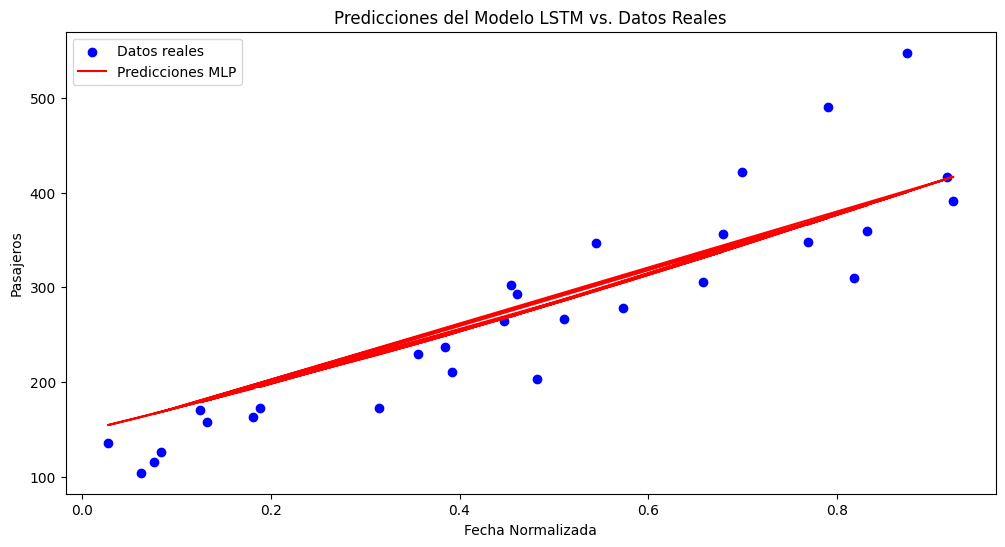

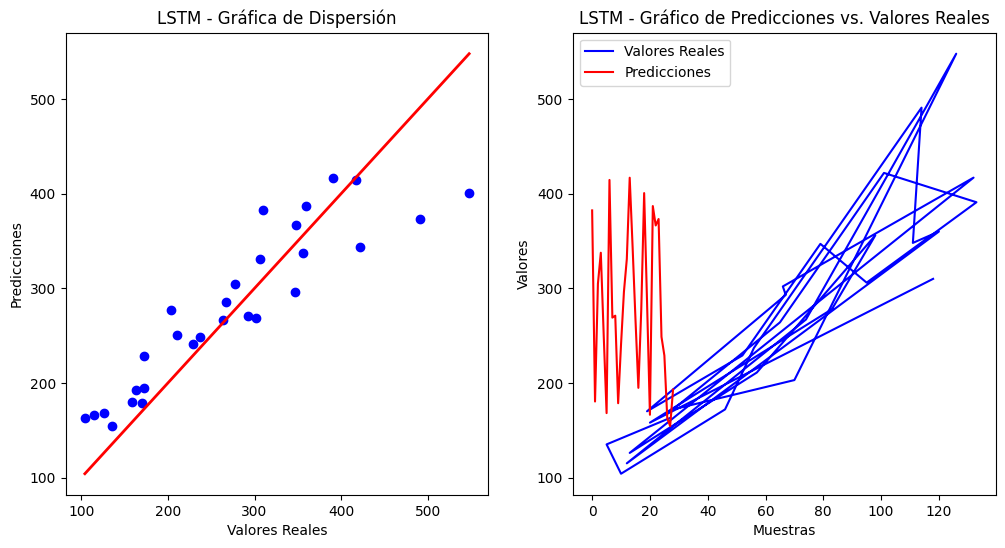

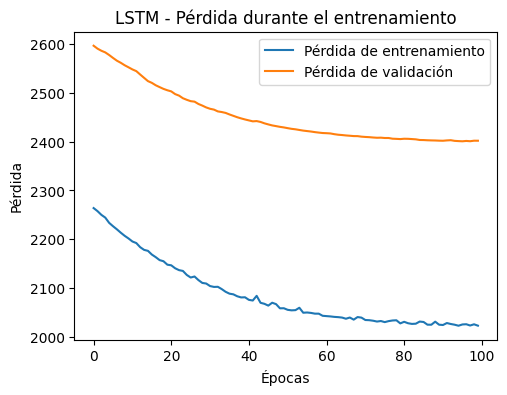

In [23]:
# Visualizar las predicciones frente a los datos reales
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred_rnn, color='red', label='Predicciones MLP')
plt.xlabel('Fecha Normalizada')
plt.ylabel('Pasajeros')
plt.legend()
plt.title('Predicciones del Modelo LSTM vs. Datos Reales')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rnn, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('LSTM - Gráfica de Dispersión')

plt.subplot(1, 2, 2)
plt.plot(y_test, label='Valores Reales', color='blue')
plt.plot(y_pred_rnn, label='Predicciones', color='red')
plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.title('LSTM - Gráfico de Predicciones vs. Valores Reales')
plt.legend()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_mlp.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.title('LSTM - Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')

plt.show()

# **Comparaciones de los modelos**

Text(0.5, 1.0, 'Predicciones del Modelo LSTM vs. Datos Reales')

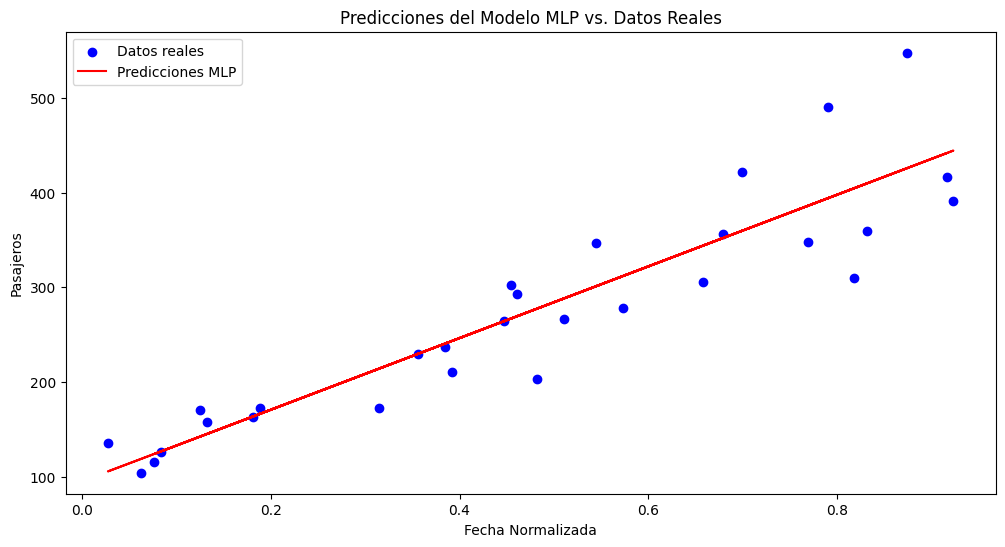

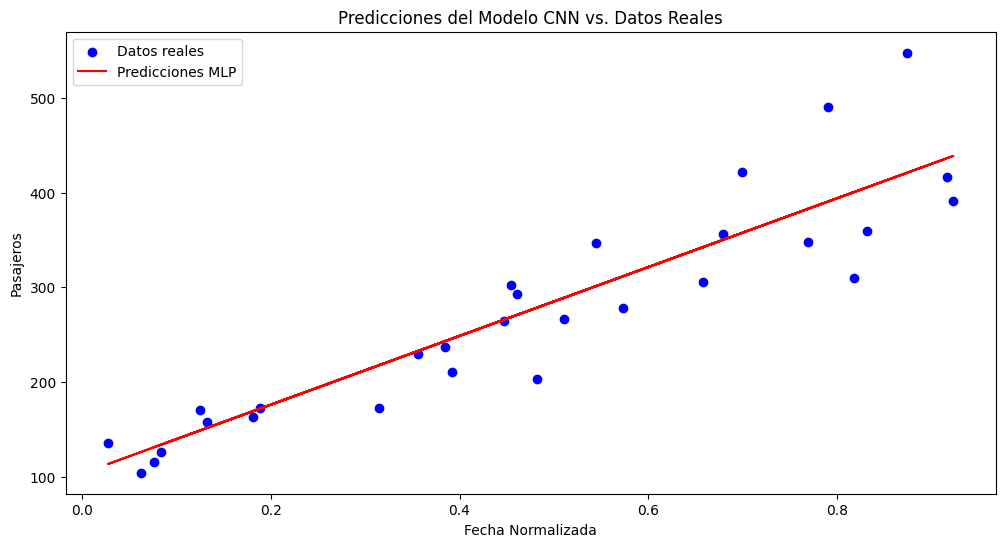

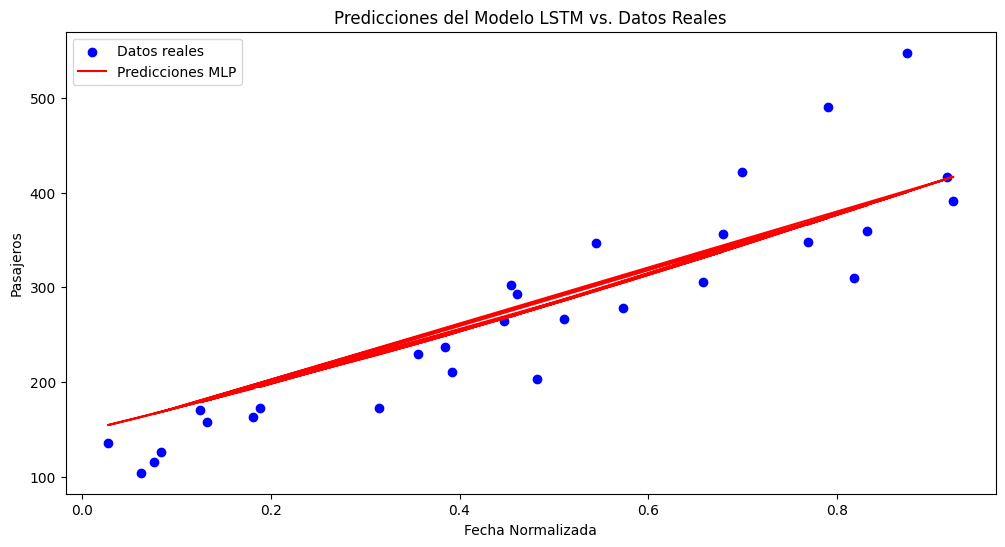

In [31]:
# Predicciones del Modelo MLP vs. Datos Reales
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred_mlp, color='red', label='Predicciones MLP')
plt.xlabel('Fecha Normalizada')
plt.ylabel('Pasajeros')
plt.legend()
plt.title('Predicciones del Modelo MLP vs. Datos Reales')

#Predicciones del Modelo CNN vs. Datos Reales
plt.figure(figsize=(12, 6))
plt.scatter(X_test_cnn, y_test, color='blue', label='Datos reales')
plt.plot(X_test_cnn, y_pred_cnn, color='red', label='Predicciones MLP')
plt.xlabel('Fecha Normalizada')
plt.ylabel('Pasajeros')
plt.legend()
plt.title('Predicciones del Modelo CNN vs. Datos Reales')

#Predicciones del Modelo LSTM vs. Datos Reales
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred_rnn, color='red', label='Predicciones MLP')
plt.xlabel('Fecha Normalizada')
plt.ylabel('Pasajeros')
plt.legend()
plt.title('Predicciones del Modelo LSTM vs. Datos Reales')


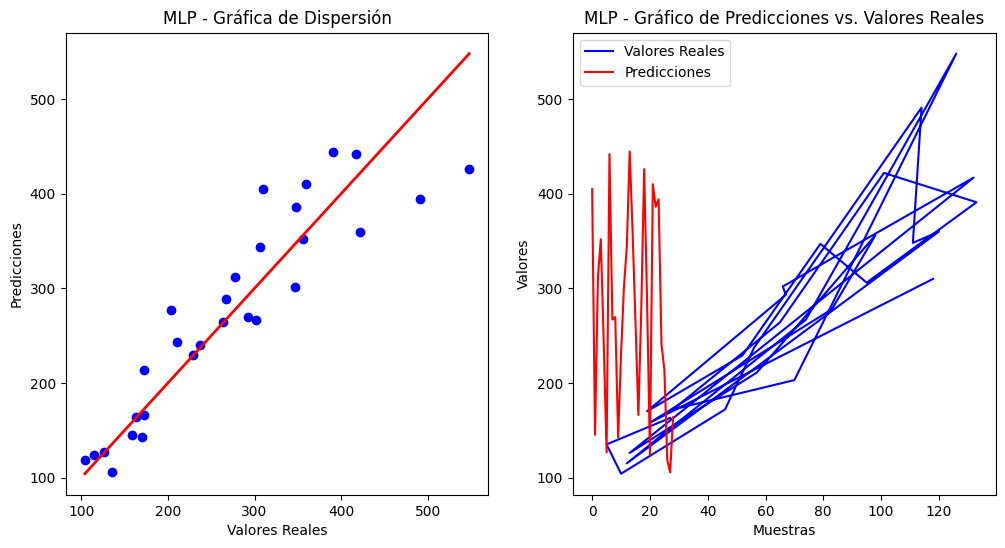

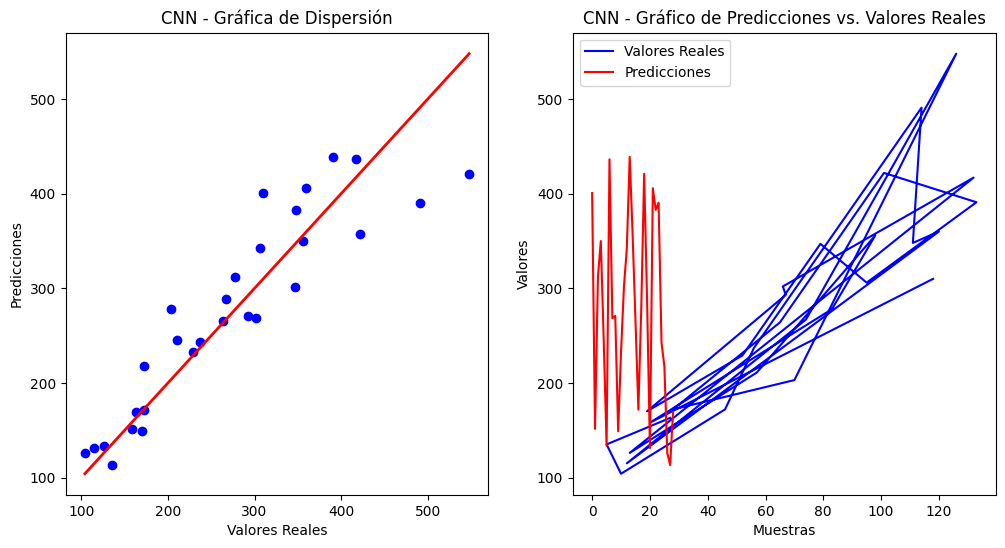

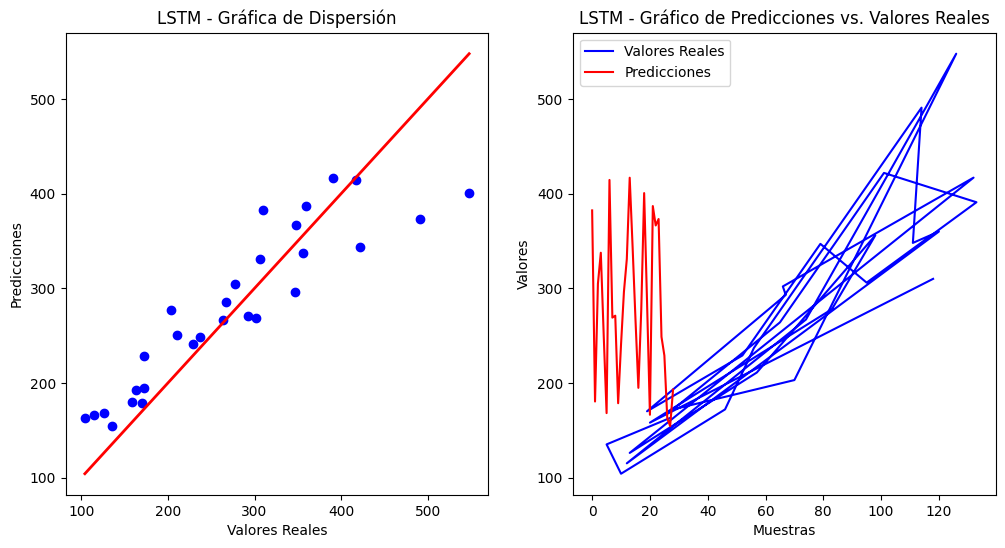

In [32]:
#MLP - Gráfica de Dispersión y Gráfico de Predicciones vs. Valores Reales'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_mlp, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('MLP - Gráfica de Dispersión')

plt.subplot(1, 2, 2)
plt.plot(y_test, label='Valores Reales', color='blue')
plt.plot(y_pred_mlp, label='Predicciones', color='red')
plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.title('MLP - Gráfico de Predicciones vs. Valores Reales')
plt.legend()

#CNN - Gráfica de Dispersión y Gráfico de Predicciones vs. Valores Reales'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_cnn, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('CNN - Gráfica de Dispersión')

plt.subplot(1, 2, 2)
plt.plot(y_test, label='Valores Reales', color='blue')
plt.plot(y_pred_cnn, label='Predicciones', color='red')
plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.title('CNN - Gráfico de Predicciones vs. Valores Reales')
plt.legend()

#LSTM - Gráfica de Dispersión y Gráfico de Predicciones vs. Valores Reales'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rnn, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('LSTM - Gráfica de Dispersión')

plt.subplot(1, 2, 2)
plt.plot(y_test, label='Valores Reales', color='blue')
plt.plot(y_pred_rnn, label='Predicciones', color='red')
plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.title('LSTM - Gráfico de Predicciones vs. Valores Reales')
plt.legend()


Text(0, 0.5, 'Pérdida')

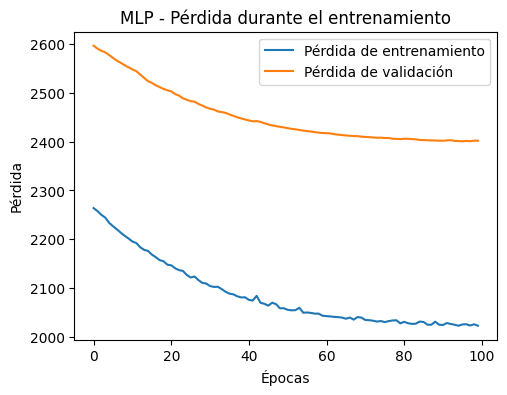

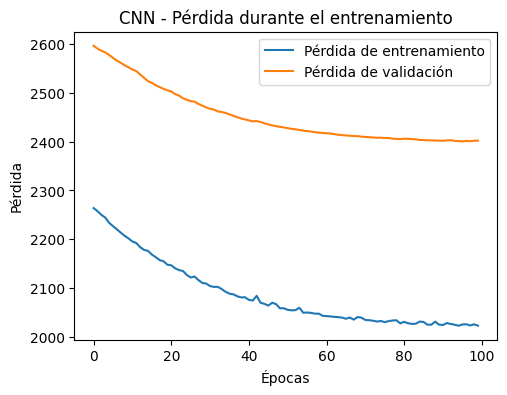

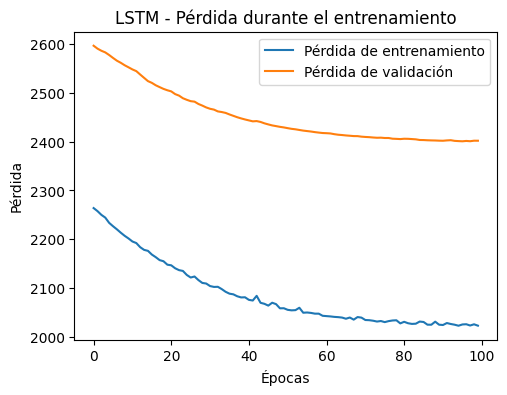

In [33]:
#MLP - Pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_mlp.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.title('MLP - Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')

#CNN - Pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_mlp.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.title('CNN - Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')

#LSTM - Pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_mlp.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.title('LSTM - Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')


In [34]:
print("-----------Modelo MLP------------")
print("Modelo MLP - error cuadrático medio (MSE):", mse_mlp)
print("Modelo MLP - coeficiente de determinación (R^2),:", r2_mlp)
print("\n")
print("-----------Modelo CNN------------")
print("Modelo CNN - error cuadrático medio (MSE):", mse_cnn)
print("Modelo CNN - coeficiente de determinación (R^2),:", r2_cnn)
print("\n")
print("-----------Modelo LSTM------------")
print("Modelo LSTM - error cuadrático medio (MSE):", mse_rnn)
print("Modelo LSTM - coeficiente de determinación (R^2),:", r2_rnn)

-----------Modelo MLP------------
Modelo MLP - error cuadrático medio (MSE): 2139.0007638475045
Modelo MLP - coeficiente de determinación (R^2),: 0.8331976175697168


-----------Modelo CNN------------
Modelo CNN - error cuadrático medio (MSE): 2141.8094605449364
Modelo CNN - coeficiente de determinación (R^2),: 0.832978591326915


-----------Modelo LSTM------------
Modelo LSTM - error cuadrático medio (MSE): 2608.878480561479
Modelo LSTM - coeficiente de determinación (R^2),: 0.796555871608947
